In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

In [265]:
dataset= pd.read_csv('Lung_Cancer_Dataset.csv')
dataset.head()

,PATIENT_ID,GENOMIC SEX,AGE,Education_Level,DOB,PLACE_OF_BIRTH,GENDER,Sexual_Partners_Life_Time,Pet_Owner,NUMBER_OF_CHILDREN,...,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMPTION,WEEKLY_GLASSES_OF_ALCOHOL,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,A10230,M,69.0,1,26/10/1955,Sukhumi,1,5,1,3,...,2.0,1,2.0,2,9,2,2,2,2,1
1,A10231,M,74.0,2,07/12/1950,Kabul,1,1,1,0,...,2.0,2,1.0,1,NaN,1,2,2,2,1
2,A10232,F,59.0,3,02/01/1965,Episkopi Cantonment,0,0,1,5,...,2.0,1,2.0,1,NaN,2,2,1,2,2
3,A10233,M,63.0,4,21/10/1961,Tirana,1,3,1,3,...,1.0,1,1.0,2,14,1,1,2,2,2
4,A10234,F,63.0,1,12/11/1961,Algiers,0,4,1,3,...,1.0,1,2.0,1,NaN,2,2,1,1,2


Dropping the columns

In [266]:
columns_to_drop = [
    'PATIENT_ID', 'Education_Level', 'DOB', 'PLACE_OF_BIRTH',
    'Sexual_Partners_Life_Time', 'Pet_Owner', 'NUMBER_OF_CHILDREN',
    'Pet_Type','ALLERGY '
]
dataset = dataset.drop(columns=columns_to_drop)

In [267]:
dataset.head()

,GENOMIC SEX,AGE,GENDER,SMOKING_STATUS,TOBACCO_TYPE,YELLOW_SKIN,ANXIETY,PEER_PRESSURE,COPD_DIAGNOSES,FATIGUE,WHEEZING,ALCOHOL_CONSUMPTION,WEEKLY_GLASSES_OF_ALCOHOL,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69.0,1,1,Vaping,2,2,1,1.0,2.0,2.0,2,9,2,2,2,2,1
1,M,74.0,1,2,Vaping,1,1,1,2.0,2.0,1.0,1,NaN,1,2,2,2,1
2,F,59.0,0,1,Vaping,1,1,2,1.0,2.0,2.0,1,NaN,2,2,1,2,2
3,M,63.0,1,2,Vaping,2,2,1,1.0,1.0,1.0,2,14,1,1,2,2,2
4,F,63.0,0,1,Vaping,2,1,1,1.0,1.0,2.0,1,NaN,2,2,1,1,2


Data Understanding: Statistical Description & Data Visualization

In [268]:
description = dataset.describe(include='all')

# Print the statistical description
print(description)

       GENOMIC SEX          AGE       GENDER  SMOKING_STATUS TOBACCO_TYPE  \
count         1120  1107.000000  1120.000000     1120.000000          375   
unique           2          NaN          NaN             NaN           10   
top              M          NaN          NaN             NaN       Vaping   
freq           578          NaN          NaN             NaN          143   
mean           NaN    59.752484     0.516071        0.513393          NaN   
std            NaN    12.025372     0.499965        0.779427          NaN   
min            NaN    20.000000     0.000000        0.000000          NaN   
25%            NaN    56.000000     0.000000        0.000000          NaN   
50%            NaN    61.000000     1.000000        0.000000          NaN   
75%            NaN    67.000000     1.000000        1.000000          NaN   
max            NaN   152.000000     1.000000        2.000000          NaN   

        YELLOW_SKIN      ANXIETY  PEER_PRESSURE  COPD_DIAGNOSES     FATIGUE

C:\Users\Hashir\AppData\Local\Temp\ipykernel_16660\2723048916.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Cancer', 'Cancer','NaN'])


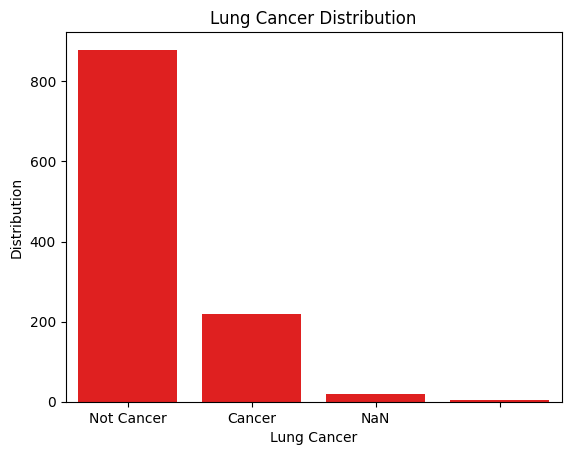

In [269]:
# Create the count plot
ax = sns.countplot(x='LUNG_CANCER', data=dataset, color='red')

# Set the custom labels for x-ticks
ax.set_xticklabels(['Not Cancer', 'Cancer','NaN'])

 
# Set the labels and title
plt.xlabel('Lung Cancer')
plt.ylabel('Distribution')
plt.title('Lung Cancer Distribution')

# Show the plot
plt.show()

Data Preparation: Cleaning and Transforming data 

In [270]:
missing_values = dataset.isnull().sum()
print(missing_values)

GENOMIC SEX                    0
AGE                           13
GENDER                         0
SMOKING_STATUS                 0
TOBACCO_TYPE                 745
YELLOW_SKIN                    0
ANXIETY                        0
PEER_PRESSURE                  0
COPD_DIAGNOSES                18
FATIGUE                        5
WHEEZING                      10
ALCOHOL_CONSUMPTION            0
WEEKLY_GLASSES_OF_ALCOHOL    501
COUGHING                       0
SHORTNESS_OF_BREATH            4
SWALLOWING_DIFFICULTY          0
CHEST_PAIN                     0
LUNG_CANCER                    0
dtype: int64


In [271]:
count_greater_than_100 = (dataset['AGE'] > 100).sum()
print(count_greater_than_100)

1


In [272]:
dataset['AGE'] = np.where(dataset['AGE'] > 100, 100, dataset['AGE'])
dataset['AGE'].fillna(dataset['AGE'].median(), inplace=True)
count_greater_than_100 = (dataset['AGE'] > 100).sum()
dataset['AGE'] = dataset['AGE'].astype(int)
print(dataset['AGE'].isnull().sum())


0


C:\Users\Hashir\AppData\Local\Temp\ipykernel_16660\3918207128.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['AGE'].fillna(dataset['AGE'].median(), inplace=True)


In [273]:
dataset['WEEKLY_GLASSES_OF_ALCOHOL'].unique()

array(['9', nan, '14', '4', '5', '12', '10', '7', '11', '15', '3', '6',
       '1', '8', '2', '13', 'SIX', '60000', 'one', '-1'], dtype=object)

In [274]:
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].replace('SIX', 6)
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].replace('60000', 1)
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].replace('one', 1)
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].replace(-1, 1)
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = pd.to_numeric(dataset['WEEKLY_GLASSES_OF_ALCOHOL'], errors='coerce')

dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].fillna(0)

# Convert to integer type
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].astype(int)
print (dataset['WEEKLY_GLASSES_OF_ALCOHOL'].unique())

[ 9  0 14  4  5 12 10  7 11 15  3  6  1  8  2 13 -1]


In [275]:
print (dataset['WHEEZING'].unique())

[ 2.  1.  3. nan]


In [276]:
dataset['WHEEZING'] = dataset['WHEEZING'].replace(3, 1)
dataset['WHEEZING'] = dataset['WHEEZING'].fillna(1)
dataset['WHEEZING'] = dataset['WHEEZING'].astype(int)
print(dataset['WHEEZING'].unique())

[2 1]


In [277]:
missing_values = dataset.isnull().sum()
print(missing_values)

GENOMIC SEX                    0
AGE                            0
GENDER                         0
SMOKING_STATUS                 0
TOBACCO_TYPE                 745
YELLOW_SKIN                    0
ANXIETY                        0
PEER_PRESSURE                  0
COPD_DIAGNOSES                18
FATIGUE                        5
WHEEZING                       0
ALCOHOL_CONSUMPTION            0
WEEKLY_GLASSES_OF_ALCOHOL      0
COUGHING                       0
SHORTNESS_OF_BREATH            4
SWALLOWING_DIFFICULTY          0
CHEST_PAIN                     0
LUNG_CANCER                    0
dtype: int64


In [278]:
dataset['SHORTNESS_OF_BREATH'].unique()

array(['2', '1', 'Two', nan, '-1'], dtype=object)

In [279]:
dataset['SHORTNESS_OF_BREATH'] = dataset['SHORTNESS_OF_BREATH'].replace('Two', 2)
dataset['SHORTNESS_OF_BREATH'] = dataset['SHORTNESS_OF_BREATH'].replace('-1', 1)
dataset['SHORTNESS_OF_BREATH'] = pd.to_numeric(dataset['SHORTNESS_OF_BREATH'], errors='coerce')
mean_value = dataset['SHORTNESS_OF_BREATH'].mean()
mean_ceil = math.ceil(mean_value)
dataset['SHORTNESS_OF_BREATH'] = dataset['SHORTNESS_OF_BREATH'].fillna(mean_ceil)
dataset['SHORTNESS_OF_BREATH'] = dataset['SHORTNESS_OF_BREATH'].astype(int)
dataset['SHORTNESS_OF_BREATH'].unique()

array([2, 1])

In [280]:
dataset['FATIGUE '].unique()

array([ 2.,  1., nan])

In [281]:
dataset = dataset.rename(columns={'FATIGUE ': 'FATIGUE'})
dataset['FATIGUE'] = dataset['FATIGUE'].fillna(1)
dataset['FATIGUE'] = dataset['FATIGUE'].astype(int)
dataset['FATIGUE'].unique()

array([2, 1])

In [282]:
dataset['COPD_DIAGNOSES'].unique()

array([ 1.,  2., nan])

In [283]:
dataset['COPD_DIAGNOSES'] = dataset['COPD_DIAGNOSES'].fillna(1)
dataset['COPD_DIAGNOSES'] = dataset['COPD_DIAGNOSES'].astype(int)
dataset['COPD_DIAGNOSES'].unique()

array([1, 2])

In [284]:
dataset['TOBACCO_TYPE'].unique()

array(['Vaping', 'VAPING', nan, 'E- cigarette', 'Cigars', 'Pipe',
       'Hookah', 'Smokeless Tobacco (Chew)', 'Cigarettes',
       'Dissolvable Tobacco', 'Kreteks'], dtype=object)

In [285]:
dataset['TOBACCO_TYPE'] = dataset['TOBACCO_TYPE'].fillna(0)
dataset['TOBACCO_TYPE'] = dataset['TOBACCO_TYPE'].apply(lambda x: 1 if x != 0 else 0)
dataset['TOBACCO_TYPE'].unique()

array([1, 0], dtype=int64)

In [286]:
dataset['GENOMIC SEX'].unique()

array(['M', 'F'], dtype=object)

In [287]:
dataset['GENOMIC SEX'] = dataset['GENOMIC SEX'].map({'M': 0, 'F': 1})
dataset['GENOMIC SEX'].unique()

array([0, 1], dtype=int64)

In [288]:
dataset['LUNG_CANCER'].unique()

array(['1', '2', 'No', 'Yes'], dtype=object)

In [289]:
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].replace('No', 1)
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].replace('Yes', 2)
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].astype(int)
dataset['LUNG_CANCER'].unique()

array([1, 2])

In [290]:
dataset.to_csv('dataset1.csv', index=False)

– Modelling: Creating Predictive Classification Models

In [291]:
features = dataset.drop(columns=['LUNG_CANCER'])
target= dataset['LUNG_CANCER']

In [292]:
x_train, x_test, y_train, y_test = train_test_split (features, target, test_size=0.2, random_state=42, stratify= target)

In [293]:
feature_names = features.columns.tolist()
print("Feature names:", feature_names)

print("Shape of training data (X_train): ", x_train.shape)
print("Shape of test data (X_test): ", x_test.shape)
print("Shape of target training data (y_train): ", y_train.shape)
print("Shape of target test data (y_test): ", y_test.shape)

Feature names: ['GENOMIC SEX', 'AGE', 'GENDER', 'SMOKING_STATUS', 'TOBACCO_TYPE', 'YELLOW_SKIN', 'ANXIETY', 'PEER_PRESSURE', 'COPD_DIAGNOSES', 'FATIGUE', 'WHEEZING', 'ALCOHOL_CONSUMPTION', 'WEEKLY_GLASSES_OF_ALCOHOL', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
Shape of training data (X_train):  (896, 17)
Shape of test data (X_test):  (224, 17)
Shape of target training data (y_train):  (896,)
Shape of target test data (y_test):  (224,)


In [294]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

tree=tree.DecisionTreeClassifier()  
tree.fit(x_train,y_train)

NB=GaussianNB()
NB.fit(x_train,y_train)

RF=RandomForestClassifier()
RF.fit(x_train,y_train)

C:\Users\Hashir\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [295]:
y_pred_lr = reg.predict(x_test)
y_pred_tree = tree.predict(x_test)
y_pred_nb = NB.predict(x_test)
y_pred_rf = RF.predict(x_test)

y_proba_tree = tree.predict_proba(x_test)[:, 1]
y_proba_nb = NB.predict_proba(x_test)[:, 1]
y_proba_rf = RF.predict_proba(x_test)[:, 1]
y_proba_lr = (y_pred_lr >= 0.5).astype(int) 

def print_metrics(name, y_true, y_pred, y_proba=None):
    print(f"Metrics for {name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    if y_proba is not None:
        print(f"AUC-ROC Score: {roc_auc_score(y_true, y_proba):.2f}")
    print()

print_metrics('Decision Tree', y_test, y_pred_tree, y_proba_tree)
print_metrics('GaussianNB', y_test, y_pred_nb, y_proba_nb)
print_metrics('Random Forest', y_test, y_pred_rf, y_proba_rf)
print_metrics('Logistic Regression', y_test, y_pred_lr_binary, y_pred_lr)  # Use y_pred_lr_binary for metrics

Metrics for Decision Tree:
Accuracy: 0.87
Precision: 0.91
Recall: 0.93
F1 Score: 0.92
AUC-ROC Score: 0.77

Metrics for GaussianNB:
Accuracy: 0.79
Precision: 0.88
Recall: 0.87
F1 Score: 0.87
AUC-ROC Score: 0.82

Metrics for Random Forest:
Accuracy: 0.88
Precision: 0.90
Recall: 0.96
F1 Score: 0.93
AUC-ROC Score: 0.94

Metrics for Logistic Regression:
Accuracy: 0.80
Precision: 0.80
Recall: 1.00
F1 Score: 0.89
AUC-ROC Score: 0.64



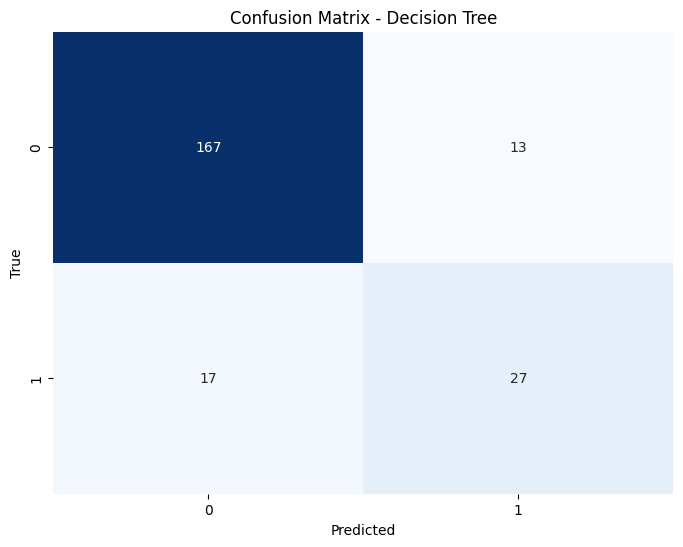

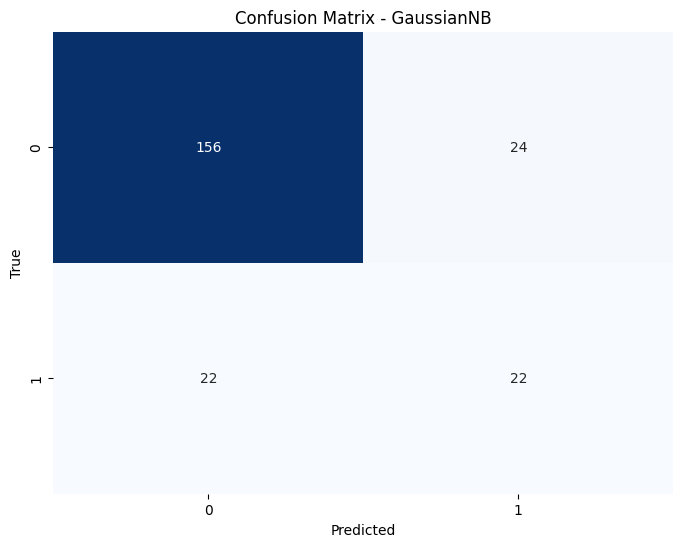

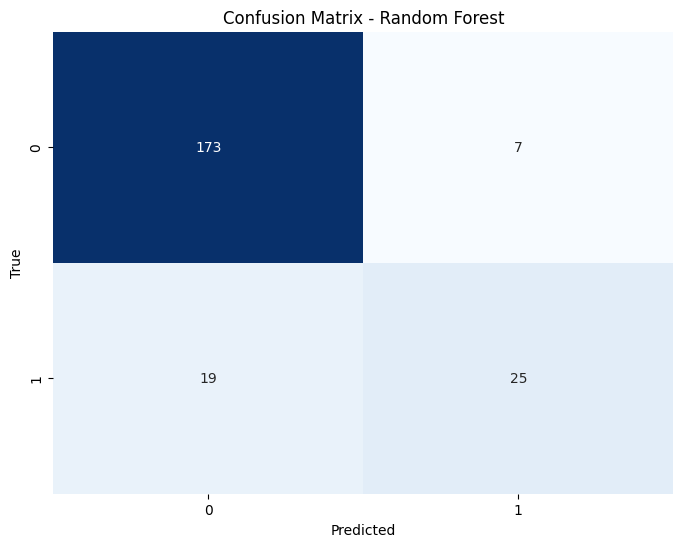

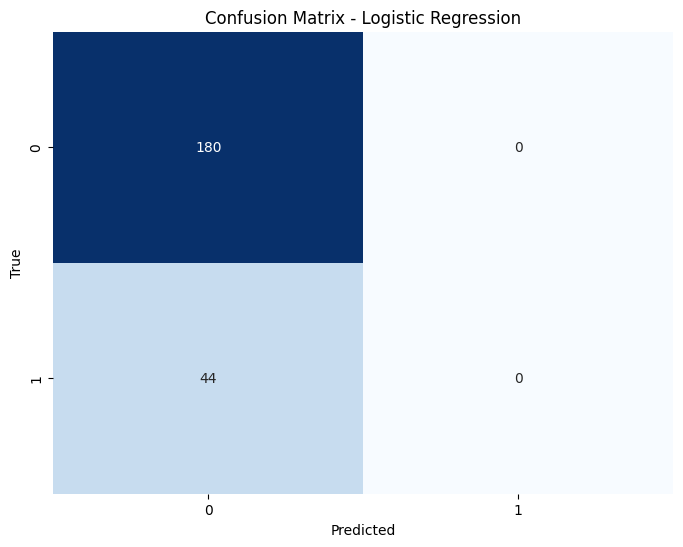

In [296]:
y_pred_lr = reg.predict(x_test)
y_pred_tree = tree.predict(x_test)
y_pred_nb = NB.predict(x_test)
y_pred_rf = RF.predict(x_test)

# Convert predictions to binary for Linear Regression
y_pred_lr_binary = (y_pred_lr >= 0.5).astype(int)

# Function to plot confusion matrix with blueish color scheme
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_tree, 'Confusion Matrix - Decision Tree')
plot_confusion_matrix(y_test, y_pred_nb, 'Confusion Matrix - GaussianNB')
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')
plot_confusion_matrix(y_test, y_pred_lr_binary, 'Confusion Matrix - Logistic Regression')

In [ ]:
df=pd.read_csv('dataset1.csv')
description = df.describe(include='all')

# Print the statistical description
print(description)

       GENOMIC SEX          AGE       GENDER  SMOKING_STATUS  TOBACCO_TYPE  \
count  1120.000000  1120.000000  1120.000000     1120.000000   1120.000000   
mean      0.483929    59.720536     0.516071        0.513393      0.334821   
std       0.499965    11.695707     0.499965        0.779427      0.472139   
min       0.000000    20.000000     0.000000        0.000000      0.000000   
25%       0.000000    56.000000     0.000000        0.000000      0.000000   
50%       0.000000    61.000000     1.000000        0.000000      0.000000   
75%       1.000000    67.000000     1.000000        1.000000      1.000000   
max       1.000000   100.000000     1.000000        2.000000      1.000000   

       YELLOW_SKIN      ANXIETY  PEER_PRESSURE  COPD_DIAGNOSES      FATIGUE  \
count  1120.000000  1120.000000    1120.000000     1120.000000  1120.000000   
mean      1.559821     1.491964       1.491071        1.495536     1.632143   
std       0.496630     0.500159       0.500144        0.5002

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],              
    'max_depth': [None, 10, 20, 30],              
    'min_samples_split': [2, 5, 10],              
    'min_samples_leaf': [1, 2, 4]                 
}


In [35]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42), 
    param_grid=param_grid,
    scoring='accuracy',                             
    cv=5,                                           
    n_jobs=-1,                                      
    verbose=2                                       
)


In [36]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [37]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [38]:
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:, 1]  

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)  
precision = precision_score(y_test, y_pred, pos_label=1)  
f1 = f1_score(y_test, y_pred, pos_label=1)  
auc_roc = roc_auc_score(y_test, y_proba)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC Score: {auc_roc:.2f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.89
Recall: 0.97
Precision: 0.91
F1 Score: 0.94
AUC-ROC Score: 0.94


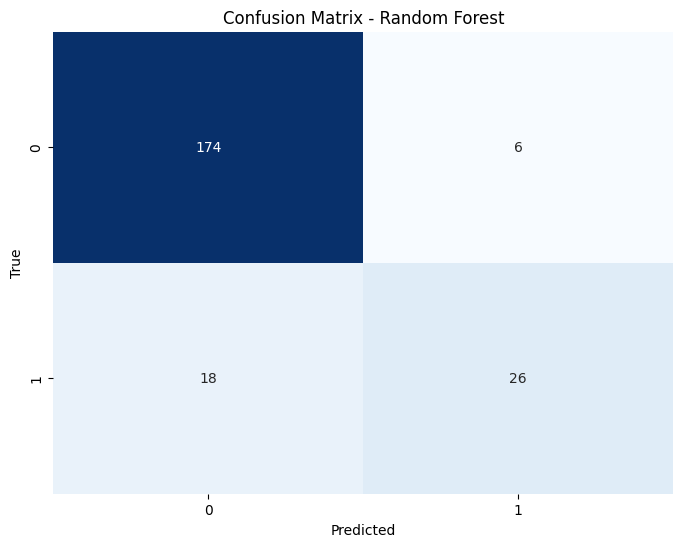

In [41]:
rt = best_model.predict(x_test)
plot_confusion_matrix(y_test, rt, 'Confusion Matrix - Random Forest')

